**GRAFICACIÓN MATRIZ ICA PARA MAPAS TOPOGRÁFICOS**

In [6]:
#cargamos el archivo de texto con los canales eeg:

#use panda to open the databases/SRMS/s1/test.txt file
import pandas as pd
import numpy as np
import mne
import scipy.io
import matplotlib.pyplot as plt

#read the file
df = pd.read_csv('/home/steve/Documentos/SNEIA/proyecto1/databases_00/EEG/SRM/cleaned_EEG/Channels_ICA.txt', sep='\t', header=0)

#el set de datos que vamos a trabajar no tiene canales malos, por tanto esta parte se omite:

#select all the rows that has status = 'bad'
#df_bad_channels = df[df['status'] == 'bad']
# get the row numbers in a list
#bad_rows = df_bad_channels.index.values.tolist()
#print(bad_rows)



# create a list with all the items in the column 'name' the list is called 'channels'
channels = df['name'].tolist()
#create a list with the types of the channels convert the strings to lower case
types = df['type'].tolist()
types = [x.lower() for x in types]

In [11]:
#importamos las librerias mne, numpy y matplotlib

import mne
import numpy as np
import matplotlib as plt

#cargamos el set de datos crudo:
info = mne.create_info(ch_names=channels, sfreq=1024)
raw_data = mne.io.read_raw_eeglab('/home/steve/Documentos/SNEIA/proyecto1/databases_00/EEG/SRM/EEGLAb/ICA_allch_nb_avg.set')
raw_data.set_montage('standard_1020')


Reading /home/steve/Documentos/SNEIA/proyecto1/databases_00/EEG/SRM/EEGLAb/ICA_allch_nb_avg.fdt


<RawEEGLAB | ICA_allch_nb_avg.fdt, 64 x 245760 (240.0 s), ~91 kB, data not loaded>

**APLICAMOS EL ALGORITMO ICA INFOMAX AL SET DE DATOS CARGADO**

Vamos a utilizar el método ICA proporcionado por la librería mne de python y vamos a visualizar las componentes independientes de forma automática utilizando la función ica.plot_components()

Fitting ICA to data using 64 channels (please be patient, this may take a while)


/tmp/ipykernel_11353/2588218748.py:5: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw_data)


Selecting by number: 64 components


/tmp/ipykernel_11353/2588218748.py:5: RuntimeWarning: Using n_components=64 (resulting in n_components_=64) may lead to an unstable mixing matrix estimation because the ratio between the largest (24) and smallest (3.9e-12) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 63
  ica.fit(raw_data)


Fitting ICA took 129.5s.


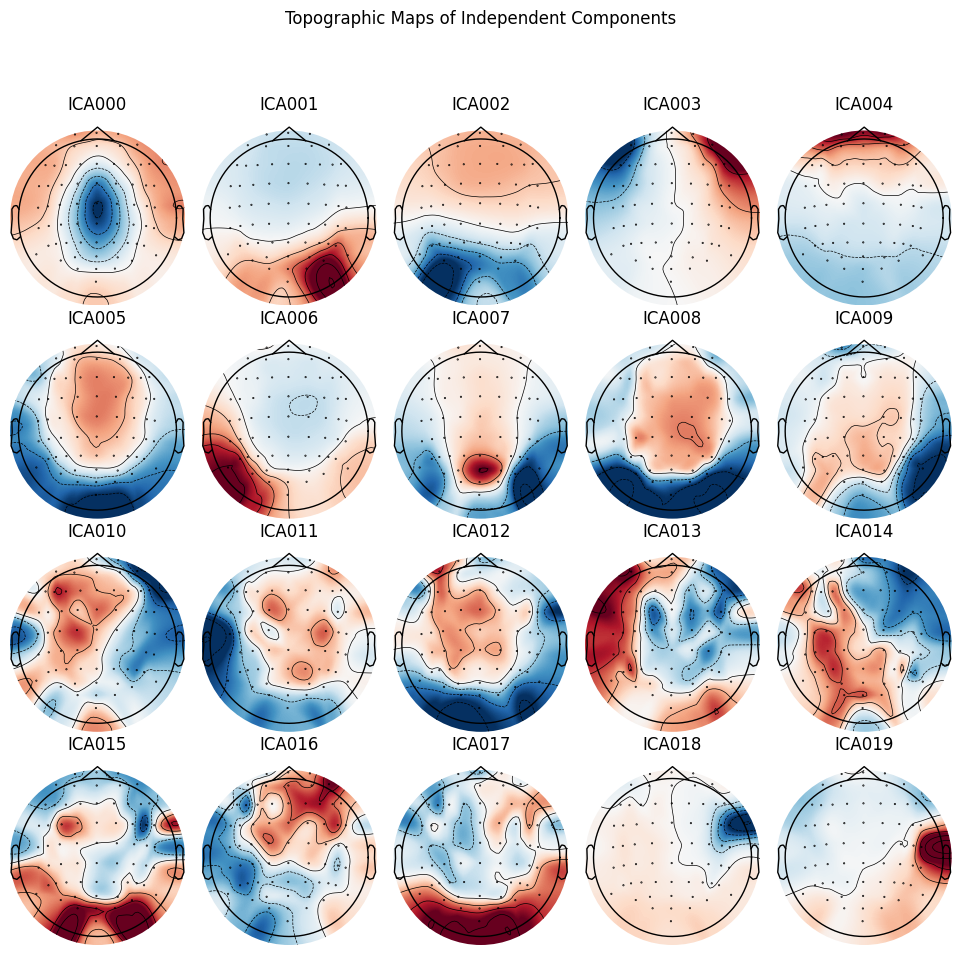

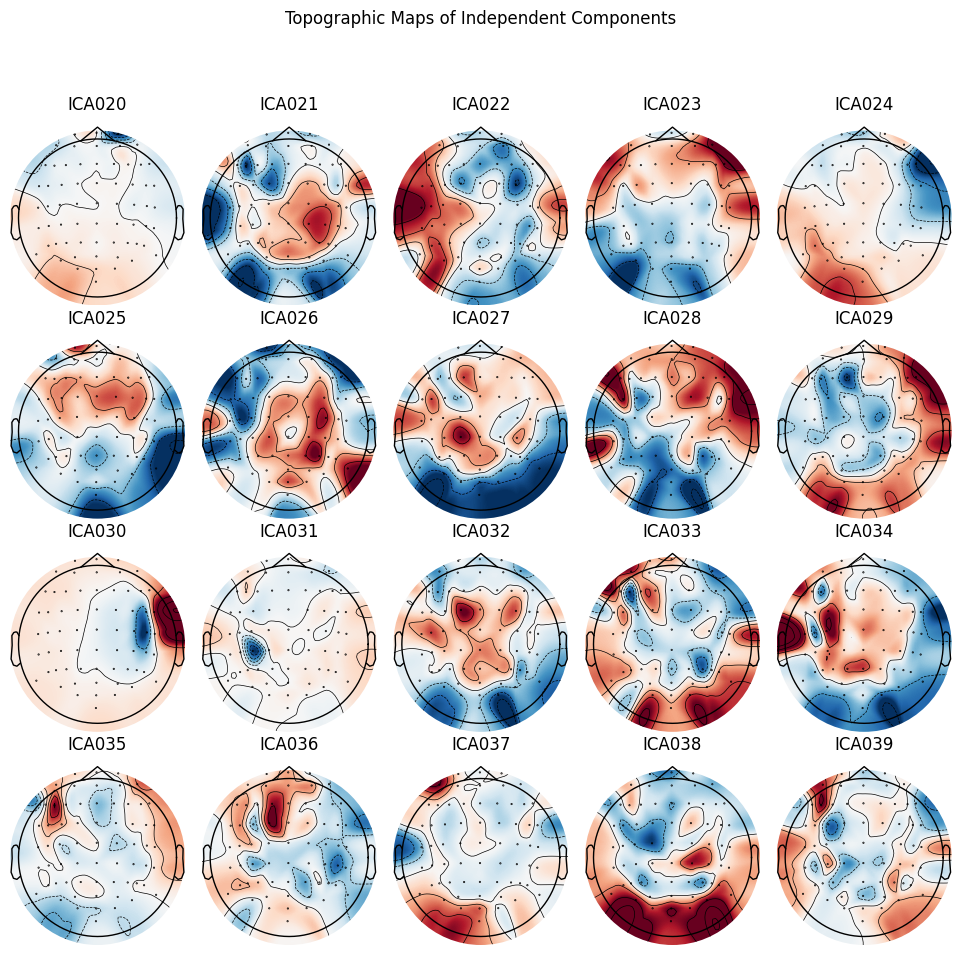

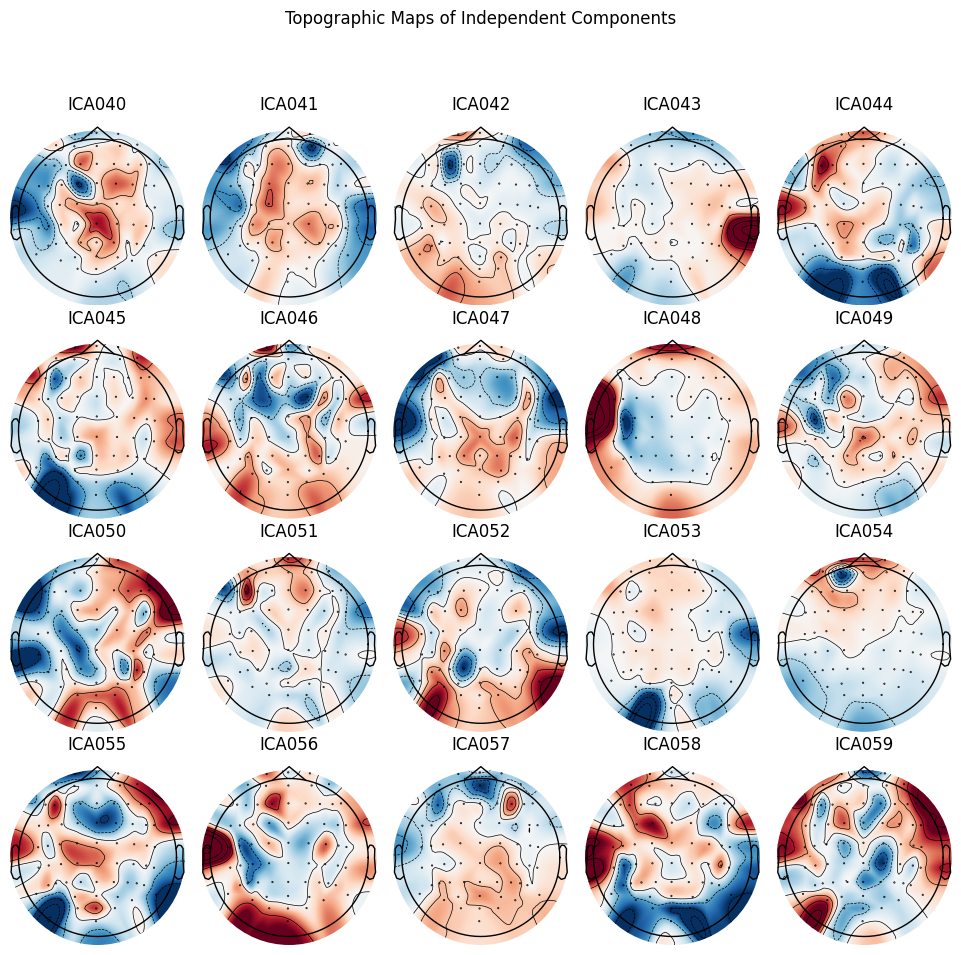

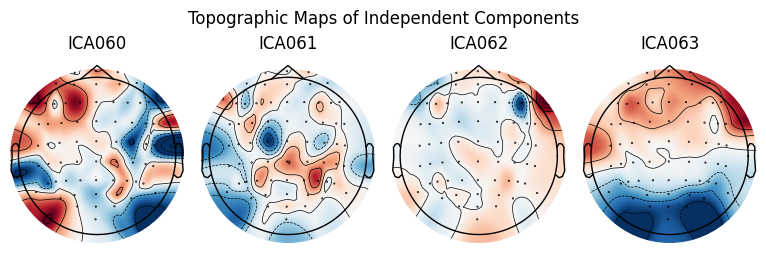

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 780x260.5 with 4 Axes>]

In [14]:
# Crear un objeto ICA
ica = mne.preprocessing.ICA(n_components=64, random_state=97, max_iter=800)

# Aplicar ICA a tus datos
ica.fit(raw_data)

# Mostrar los mapas topográficos de las componentes independientes sin especificar picks
ica.plot_components(title='Topographic Maps of Independent Components')

podemos visualizar la componente ICA004, es un posible candidato a ser una componente ocular. Esta será la componente que deseamos obtener directamente generando la gráfica de forma manual usando la matriz de mezcla ICA.

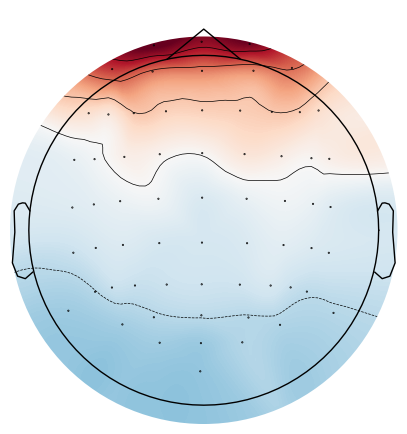

(<matplotlib.image.AxesImage at 0x7fd0f55036a0>,
 <matplotlib.contour.QuadContourSet at 0x7fd0f5503bb0>)

In [21]:
import matplotlib.pyplot as plt

IC_deseado= 4 #Las componentes principales están indexadas desde cero

#Matriz de mezcla ICA
matriz_mezcla_ica= ica.get_components()

#Creación del mapa topográfico a partir de la matriz de mezcla:
fig, ax = plt.subplots(figsize=(5,5))
mne.viz.plot_topomap(matriz_mezcla_ica[:,IC_deseado], raw_data.info, axes=ax)

Hemos encontrado la componente ocular directamente desde la matriz de mezcla.